<a href="https://colab.research.google.com/github/CodeWithDks/Carbon-Emissions-Prediction-using-Atmospheric-Data/blob/main/Carbon_Emissions_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Radhe')

Radhe


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Display Settings
pd.set_option('display.max_columns', None)


In [ ]:
# Load Dataset
train = pd.read_csv('/content/drive/MyDrive/DataSets/Atmospheric Data/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/DataSets/Atmospheric Data/Test.csv')


In [ ]:
# Display the data
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,56.896198,-89.545030,17.991569,0.000033,0.023408,2829.881106,2583.717282,835381.851887,24.227459,56.937397,-89.606501,18.019698,0.000057,0.000016,0.000041,0.000127,9904.580385,-1.668380,0.080565,835960.031250,-13.285625,45.229958,-92.185623,22.836521,0.000327,0.955292,0.000221,0.223929,17.991569,-89.545030,56.896198,24.939440,-0.827406,836132.990994,-37.714318,48.482034,-92.858289,25.377301,0.121379,2.771816,0.340750,226.969563,0.544172,-37.714318,48.482034,-92.858289,25.377301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392759,47991.296016,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,31.137265,-88.956530,20.223611,-0.000067,0.024189,2136.614929,1864.319244,836015.109375,-14.290228,27.514546,-90.409693,23.053571,0.000069,0.000029,0.000040,0.000131,8935.897092,-1.347168,0.063770,835799.541667,16.624162,31.137265,-88.956530,20.223611,0.000217,1.208491,0.000189,0.156222,19.496789,-88.674842,33.211209,31.438973,-0.986435,836090.625000,-25.925806,39.234204,-90.410349,23.857288,0.118592,2.485873,0.299359,228.693974,0.384905,-25.925806,39.234204,-90.410349,23.857288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.418427,61615.924069,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,ID_-23.73_28.77_2019_3

In [ ]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,55.548961,-94.964386,30.229884,0.000015,0.025937,2343.109252,1303.421296,836310.926686,-80.525540,50.020040,-94.822642,29.510213,0.000069,0.000027,0.000041,0.000153,9662.019782,-1.133541,0.081843,835956.054688,-35.601709,56.745405,-92.732373,24.507811,0.000141,1.010577,0.000089,0.114581,30.229640,-94.964243,55.547503,-80.286338,-1.080887,835969.424828,-37.666914,46.985239,-92.915360,24.215910,0.121514,2.718530,0.334556,228.373068,0.289126,-70.164815,46.114567,-94.538590,28.377329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.443027,74897.052000,2180.266538,81287.074479,1562.031017,10.734123,0.280660,-31.230174,33.337966,-93.217261,23.358251
1,ID_-23.53_27.47_2019_2,-23.53,27.47,2019,2,0.000181,0.423171,0.000062,0.075100,-17.765690,56.321248,-89.763833,23.313511,0.000024,0.025041,2187.909800,347.591639,836017.160096,-56.480581,35.874919,-91.053865,24.333551,0.000080,0.000039,0.000041,0.000160,8705.951365,-1.237256,0.042643,835157.398416,50.374223,55.107811,-85.736668,14.604684,0.000263,0.942414,0.000155,0.089042,23.581974,-89.966856,55.809658,-21.607660,-0.684105,835913.335697,-21.607660,55.809658,-89.966856,23.581974,0.118854,2.986835,0.360189,229.628345,0.093648,-21.607660,55.809658,-89.966856,23.581974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027363,84222.653521,982.619057,90307.650011,927.111222,5.250020,0.238933,66.490898,58.137794,-85.001467,13.416481
2,ID_-23.53_27.47_2019_3,-23.53,27.47,2019,3,0.000059

In [ ]:
print(" Train Shape:", train.shape)
print(" Test Shape:", test.shape)

 Train Shape: (74005, 76)
 Test Shape: (28085, 75)


In [ ]:
# Basic Info
print("\n Training Data Info:")
train.info()


 Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74005 entries, 0 to 74004
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      74005 non-null  object 
 1   latitude                                                  74005 non-null  float64
 2   longitude                                                 74005 non-null  float64
 3   year                                                      74005 non-null  int64  
 4   week_no                                                   74005 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  72075 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              72075 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            72075 non-null  float64

In [ ]:
print("\n Testing Data Info:")
test.info()


 Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28085 entries, 0 to 28084
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      28085 non-null  object 
 1   latitude                                                  28085 non-null  float64
 2   longitude                                                 28085 non-null  float64
 3   year                                                      28085 non-null  int64  
 4   week_no                                                   28085 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  27168 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              27168 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            27168 non-null  float64


In [ ]:
#  Missing Values Count
print("\n Missing Values in Training Data:")
missing_train = train.isnull().sum()
print(missing_train[missing_train > 0].sort_values(ascending=False))


 Missing Values in Training Data:
UvAerosolLayerHeight_sensor_zenith_angle      69027
UvAerosolLayerHeight_aerosol_height           69027
UvAerosolLayerHeight_solar_azimuth_angle      69027
UvAerosolLayerHeight_sensor_azimuth_angle     69027
UvAerosolLayerHeight_aerosol_optical_depth    69027
                                              ...  
Ozone_sensor_zenith_angle                       205
Ozone_cloud_fraction                            205
Ozone_O3_effective_temperature                  205
Ozone_O3_column_number_density_amf              205
Ozone_O3_slant_column_number_density            205
Length: 70, dtype: int64


In [ ]:
print("\n Missing Values in Testing Data:")
missing_test = test.isnull().sum()
print(missing_test[missing_test > 0].sort_values(ascending=False))


 Missing Values in Testing Data:
UvAerosolLayerHeight_aerosol_optical_depth                  26255
UvAerosolLayerHeight_sensor_azimuth_angle                   26255
UvAerosolLayerHeight_solar_azimuth_angle                    26255
UvAerosolLayerHeight_solar_zenith_angle                     26255
UvAerosolLayerHeight_sensor_zenith_angle                    26255
UvAerosolLayerHeight_aerosol_height                         26255
UvAerosolLayerHeight_aerosol_pressure                       26255
Cloud_cloud_base_pressure                                    1133
Cloud_cloud_base_height                                      1133
Cloud_cloud_optical_depth                                    1133
Cloud_surface_albedo                                         1133
Cloud_sensor_azimuth_angle                                   1133
Cloud_cloud_fraction                                         1133
Cloud_cloud_top_pressure                                     1133
Cloud_cloud_top_height                    

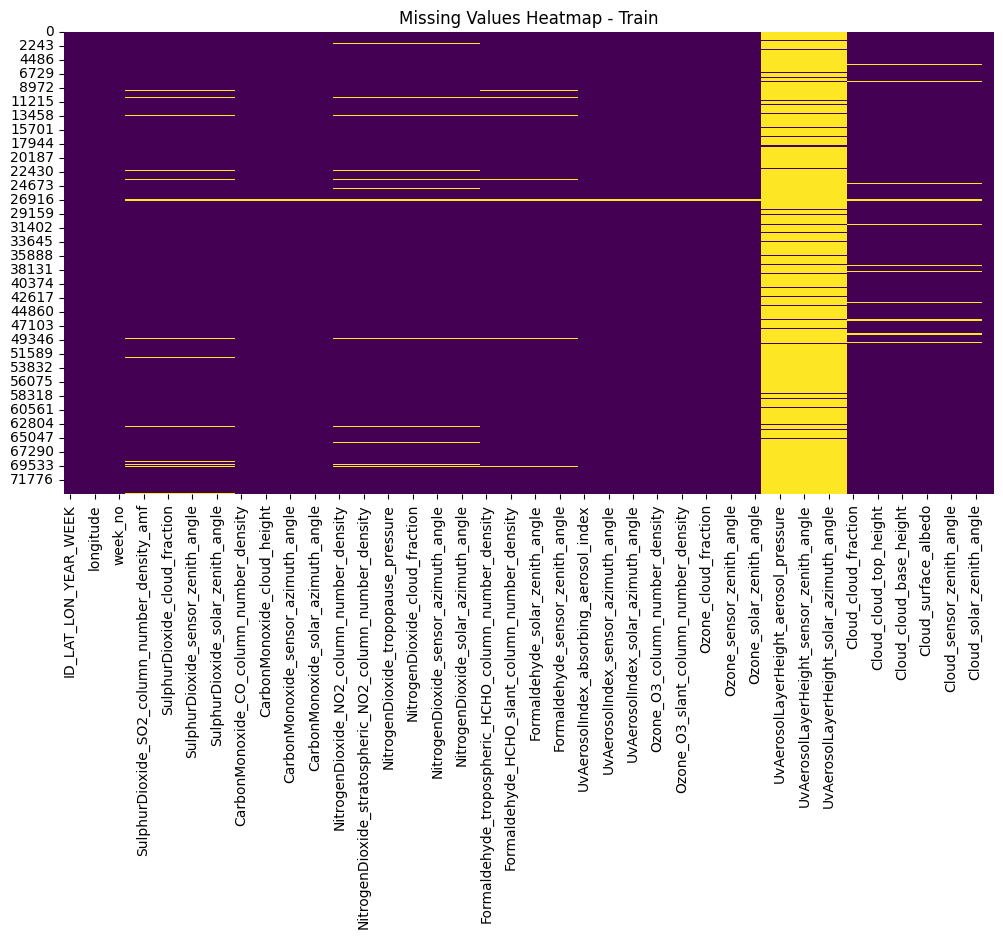

In [ ]:
#  Visualize Missing Data
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap - Train")
plt.show()


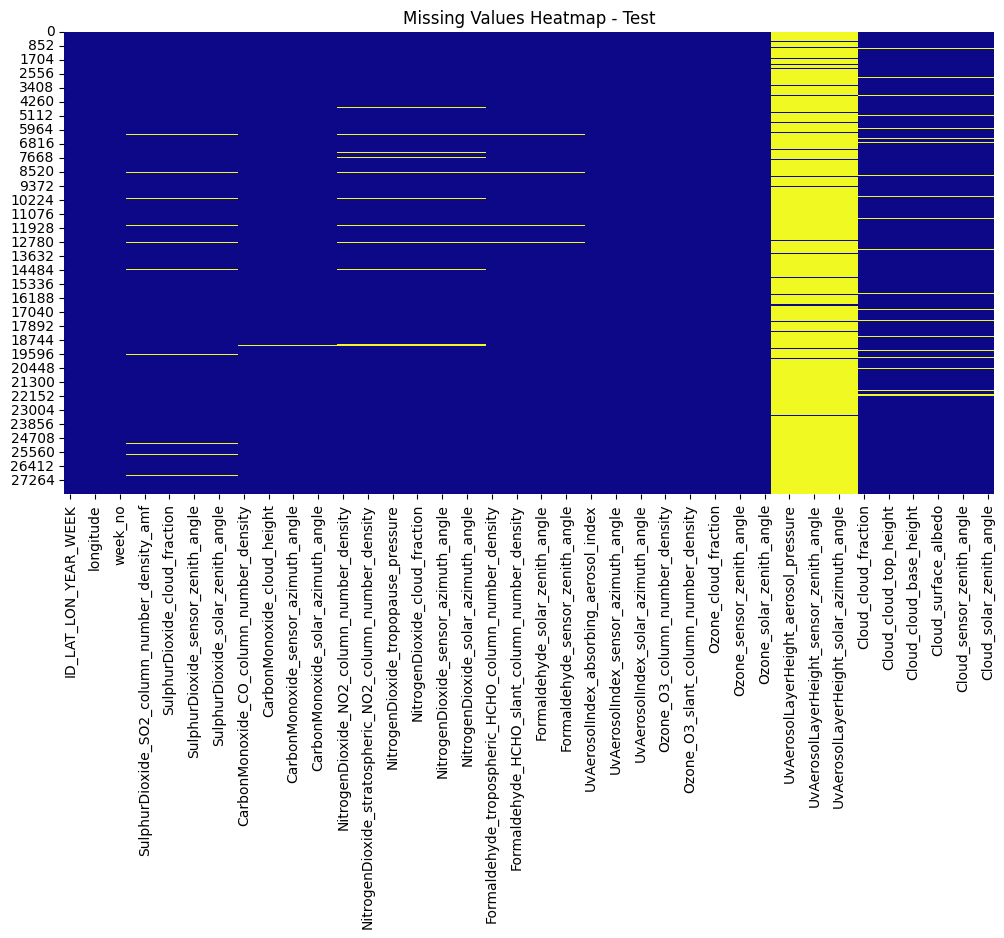

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(test.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Values Heatmap - Test")
plt.show()

In [ ]:
#  Drop High-NaN Columns (like UvAerosolLayerHeight_*)
high_nan_cols = [col for col in train.columns if train[col].isnull().mean() > 0.4]
print(f"\n Dropping High NaN Columns (>40% missing): {len(high_nan_cols)} columns")
train.drop(columns=high_nan_cols, inplace=True)
test.drop(columns=high_nan_cols, inplace=True)


 Dropping High NaN Columns (>40% missing): 7 columns


In [ ]:
#  Remove ID column (but save for later)
id_col = 'ID_LAT_LON_YEAR_WEEK'
test_ids = test[id_col]
train.drop(columns=[id_col], inplace=True)
test.drop(columns=[id_col], inplace=True)

In [ ]:
#  Check again
print("\n Shapes after column removal:")
print("Train:", train.shape)
print("Test :", test.shape)


 Shapes after column removal:
Train: (74005, 68)
Test : (28085, 67)


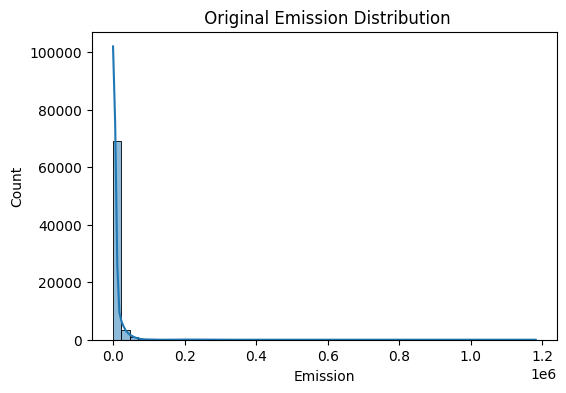

In [ ]:
#  Target Distribution (Original)
plt.figure(figsize=(6, 4))
sns.histplot(train['emission'], bins=50, kde=True)
plt.title(" Original Emission Distribution")
plt.xlabel("Emission")
plt.show()

In [ ]:
#  Log-transform the skewed target
train['log_emission'] = np.log1p(train['emission'])


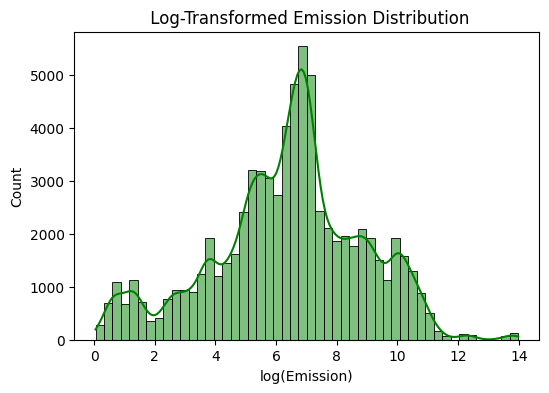

In [ ]:
#  Target Distribution (Log-Transformed)
plt.figure(figsize=(6, 4))
sns.histplot(train['log_emission'], bins=50, kde=True, color='green')
plt.title(" Log-Transformed Emission Distribution")
plt.xlabel("log(Emission)")
plt.show()

In [ ]:
#  Drop rows with NaN in Train (Safe)
#train.dropna(inplace=True)

In [ ]:
#  Impute Test Set (Safe Imputation)
#test.fillna(test.median(numeric_only=True), inplace=True)

In [ ]:
# Remove rows with ALL missing values (if any)
train = train.dropna(how='all')
test = test.dropna(how='all')

In [ ]:
# For imputation, use ONLY training data statistics
numeric_cols = train.select_dtypes(include=[np.number]).columns
train_medians = train[numeric_cols].median()

In [ ]:
# Apply training medians to both train and test
train[numeric_cols] = train[numeric_cols].fillna(train_medians)
test[numeric_cols] = test[numeric_cols].fillna(train_medians)

In [ ]:
#  Final Confirmation
print("\n Final Shape:")
print("Train:", train.shape)
print("Test :", test.shape)



 Final Shape:
Train: (68699, 69)
Test : (28085, 67)


# **Stage 2: Data Preprocessing**

Step 2.1: Drop Columns with Excessive Missing Values

In [ ]:
# Threshold for dropping columns
threshold = 0.9  # 90%

In [ ]:
# Drop columns with more than 90% missing values
train_null_ratio = train.isnull().mean()
test_null_ratio = test.isnull().mean()

cols_to_drop = train_null_ratio[train_null_ratio > threshold].index.union(
    test_null_ratio[test_null_ratio > threshold].index
)


In [ ]:
# Drop them from both train and test
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [ ]:
print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: []


Step 2.2: Impute Remaining Missing Values

In [ ]:
# Impute all remaining missing values with column mean
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [ ]:
# Verify
print("Missing values after imputation (train):", train.isnull().sum().sum())
print("Missing values after imputation (test):", test.isnull().sum().sum())

Missing values after imputation (train): 0
Missing values after imputation (test): 0


Step 2.3: Drop Irrelevant or Redundant Features

In [ ]:
# Check if column exists before dropping
if 'ID_LAT_LON_YEAR_WEEK' in train.columns:
    train.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace=True)

In [ ]:
if 'ID_LAT_LON_YEAR_WEEK' in test.columns:
    test.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace=True)

In [ ]:
print(train.columns.tolist())


['latitude', 'longitude', 'year', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_absorb

Step 2.4: Feature Scaling & Final Checks

In [ ]:
# Check if log_emission exists
target_col = 'log_emission' if 'log_emission' in train.columns else 'emission'


In [ ]:
# Compute correlation
correlation_matrix = train.corr()

In [ ]:
# Top correlated features with target
top_features = correlation_matrix[target_col].abs().sort_values(ascending=False).drop(target_col).head(20)
print("Top 20 features most correlated with target:\n", top_features)

Top 20 features most correlated with target:
 longitude                                                 0.463644
NitrogenDioxide_NO2_column_number_density                 0.346527
NitrogenDioxide_tropospheric_NO2_column_number_density    0.344699
NitrogenDioxide_NO2_slant_column_number_density           0.317402
emission                                                  0.298895
SulphurDioxide_SO2_column_number_density_amf              0.124276
Ozone_cloud_fraction                                      0.105661
CarbonMonoxide_sensor_altitude                            0.101918
SulphurDioxide_SO2_column_number_density                  0.084253
Formaldehyde_HCHO_slant_column_number_density             0.083714
Formaldehyde_tropospheric_HCHO_column_number_density      0.081238
latitude                                                  0.081017
NitrogenDioxide_cloud_fraction                            0.078811
Ozone_O3_slant_column_number_density                      0.078129
UvAerosolIndex_s

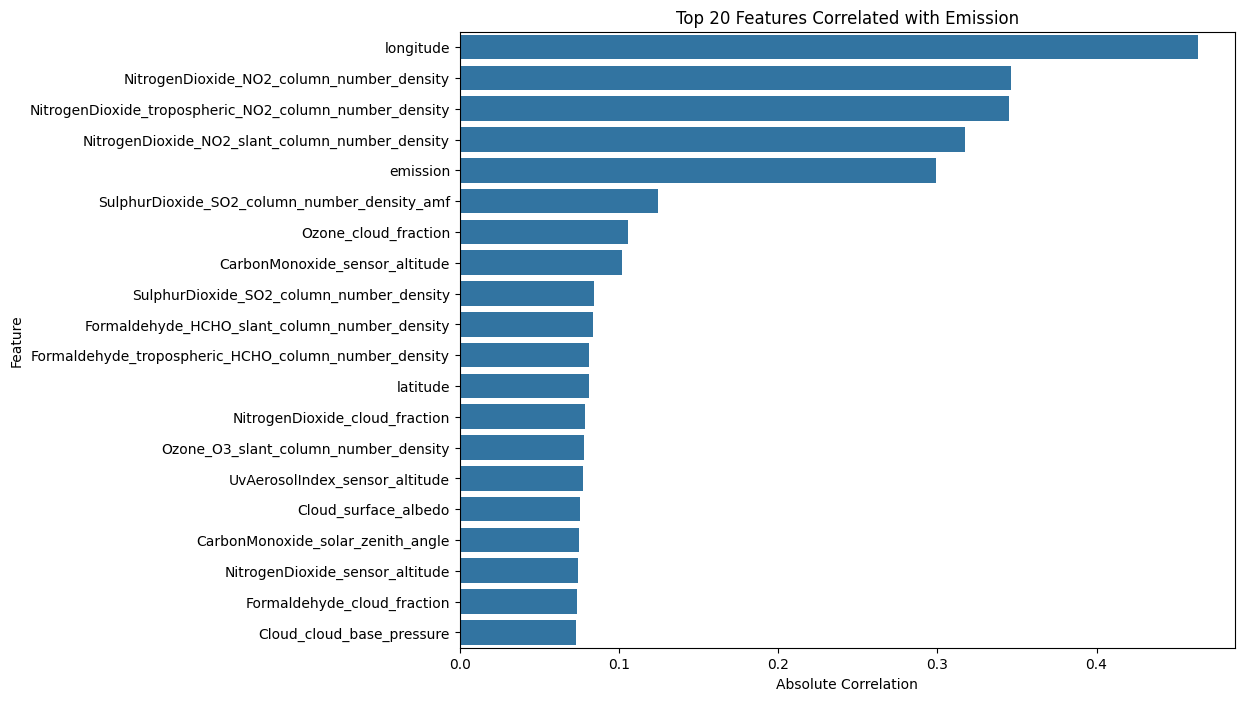

In [ ]:
# Visualize
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Features Correlated with Emission")
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.show()

In [ ]:
selected_features = [
    # Geo
    'latitude', 'longitude',

    # Nitrogen Dioxide (NO2) – Major fossil fuel emission marker
    'NitrogenDioxide_NO2_column_number_density',
    'NitrogenDioxide_tropospheric_NO2_column_number_density',
    'NitrogenDioxide_NO2_slant_column_number_density',
    'NitrogenDioxide_cloud_fraction',
    'NitrogenDioxide_sensor_altitude',

    # Sulphur Dioxide (SO2)
    'SulphurDioxide_SO2_column_number_density',
    'SulphurDioxide_SO2_column_number_density_amf',

    # Carbon Monoxide (CO)
    'CarbonMonoxide_sensor_altitude',
    'CarbonMonoxide_solar_zenith_angle',

    # Formaldehyde (HCHO)
    'Formaldehyde_HCHO_slant_column_number_density',
    'Formaldehyde_tropospheric_HCHO_column_number_density',
    'Formaldehyde_cloud_fraction',

    # Ozone
    'Ozone_O3_slant_column_number_density',
    'Ozone_cloud_fraction',

    # Clouds/Climate
    'Cloud_cloud_base_pressure',
    'Cloud_surface_albedo',

    # Radiation/Environmental
    'UvAerosolIndex_sensor_altitude',
]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[selected_features] = scaler.fit_transform(train[selected_features])
test[selected_features] = scaler.transform(test[selected_features])


Check for Categorical Columns for Encoding

In [ ]:
# Check for categorical columns in train and test
categorical_cols_train = train.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols_test = test.select_dtypes(include=['object', 'category']).columns.tolist()


In [ ]:
# Display unique columns from both
categorical_cols = list(set(categorical_cols_train + categorical_cols_test))

In [ ]:
print("Categorical columns found:", categorical_cols)

Categorical columns found: []


Step 2.5: Feature Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate features and target
X_train = train.drop(columns=['emission', 'log_emission'])
y_train = train['log_emission']

In [ ]:
# For test data, just drop columns that exist in test
cols_to_drop_in_test = [col for col in ['emission', 'log_emission'] if col in test.columns]
X_test = test.drop(columns=cols_to_drop_in_test)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3.1: Train-Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split X_train_scaled and y_train into internal training and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

In [ ]:
print("Training Set Shape:", X_tr.shape)
print("Validation Set Shape:", X_val.shape)

Training Set Shape: (54959, 67)
Validation Set Shape: (13740, 67)


**Step 3.2.1: Train & Evaluate Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_tr, y_tr)

LinearRegression()

In [ ]:
# Predict on validation set
y_pred_lr = lr.predict(X_val)

In [ ]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mae = mean_absolute_error(y_val, y_pred_lr)
r2 = r2_score(y_val, y_pred_lr)

In [ ]:
print("📊 Linear Regression Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

📊 Linear Regression Evaluation:
RMSE: 1.9957
MAE: 1.5791
R² Score: 0.3489


**Step 3.2.2 → Train & Evaluate Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Initialize and train
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Predict
y_pred_rf = rf.predict(X_val)

In [ ]:
# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

In [ ]:
print("🌲 Random Forest Regressor Evaluation:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

🌲 Random Forest Regressor Evaluation:
RMSE: 0.2294
MAE: 0.0957
R² Score: 0.9914


**Step 3.2.3: Train & Evaluate XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Initialize and train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb.fit(X_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict
y_pred_xgb = xgb.predict(X_val)

In [ ]:
# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

In [ ]:
print("⚡ XGBoost Regressor Evaluation:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

⚡ XGBoost Regressor Evaluation:
RMSE: 0.5411
MAE: 0.3952
R² Score: 0.9521


# Stage 4: Final Model and Prediction

**Step 4.1: Train Random Forest on Full Training Data**

In [ ]:
# Train on full training data
final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
final_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

**Step 4.2: Predict on Test Set**

In [ ]:
# Predict log_emission on test set
log_emission_pred = final_model.predict(X_test_scaled)

In [ ]:
# Convert back to original emission scale
emission_pred = np.expm1(log_emission_pred)  # inverse of log1p

**Step 4.3: Prepare Submission File**

In [ ]:
# If ID column was preserved, else create dummy index
submission = test.copy()
submission['emission'] = emission_pred

# If 'ID_LAT_LON_YEAR_WEEK' exists in your original test set, use it
# submission = pd.DataFrame({
#     'ID_LAT_LON_YEAR_WEEK': test_ids,  # if previously saved
#     'emission': emission_pred
# })

In [ ]:
# Reload the original test set to get back the ID column
test = pd.read_csv('/content/drive/MyDrive/DataSets/Atmospheric Data/Test.csv')

# Create final submission with ID column
submission_final = test[['ID_LAT_LON_YEAR_WEEK']].copy()
submission_final['emission'] = submission['emission']

# Save final submission
submission_final.to_csv("co2_submission_final.csv", index=False)
print("✅ Final submission file 'co2_submission_final.csv' created!")


✅ Final submission file 'co2_submission_final.csv' created!
